# ***Data Exploration referring to a Credit Analysis table.***

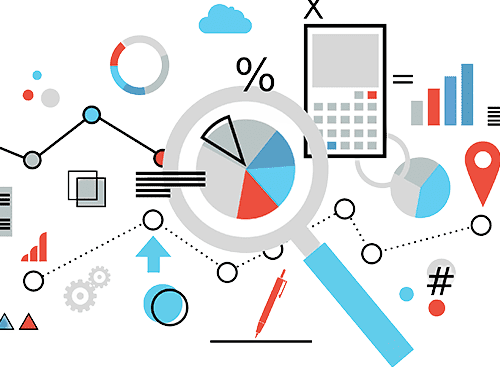

---

# **Topics:**
1. Project Context;
2. Data Information;
3. Exploratory Analysis;

---

# 1. **Project** Context

* The table was given by one of the instructors of the course I took at EBAC (British School of Arts and Sciences) named André Perez, who is also well known in the field of **Data Science.  https://github.com/andre-marcos-perez/ebac-course-utils**
* This **table** contains various information about customers of a particular Financial Institution not specified.
* The information is of paramount importance to analyze the **granting of credit** for customers.

# 2. Information of the **Data** present in the table:
* age = customer age
* gender = customer's gender (F or M)
* dependents = number of customer's dependents
* education = customer's education level
* annual_salary = salary range of the client
* card_type = customer card type
* qty_products = quantity of products purchased in the last 12 months
* iterations_12m = number of iterations/transactions in the last 12 months
* months_inativo_12m = number of months the customer was inactive
* credit limit = customer credit limit
* valor_transacoes_12m = value of transactions in the last 12 months
* qtd_transacoes_12m = number of transactions in the last 12 months

# 3. Data Types:
  * `idade` int,
  * `sexo` string,
  * `dependentes` int,
  * `escolaridade` string,
  * `estado_civil` string,
  * `salario_anual` string,
  * `tipo_cartao` string, 
  * `qtd_produtos` bigint,
  * `iteracoes_12m` int,
  * `meses_inativo_12m` int,
  * `limite_credito` float,
  * `valor_transacoes_12m` float,
  * `qtd_transacoes_12m` int 

# 4. *Exploratory Data Analysis*:
> To perform the Analysis I used an online data exploration platform, the **SQL OnLine IDE**, follow the link: https://sqliteonline.com/

---

# QUERY 1: GENERAL TABLE
> In order to visualize all the information present in the table in general, I will use the following command:
​
```sql
select *
from credit_analysis
```

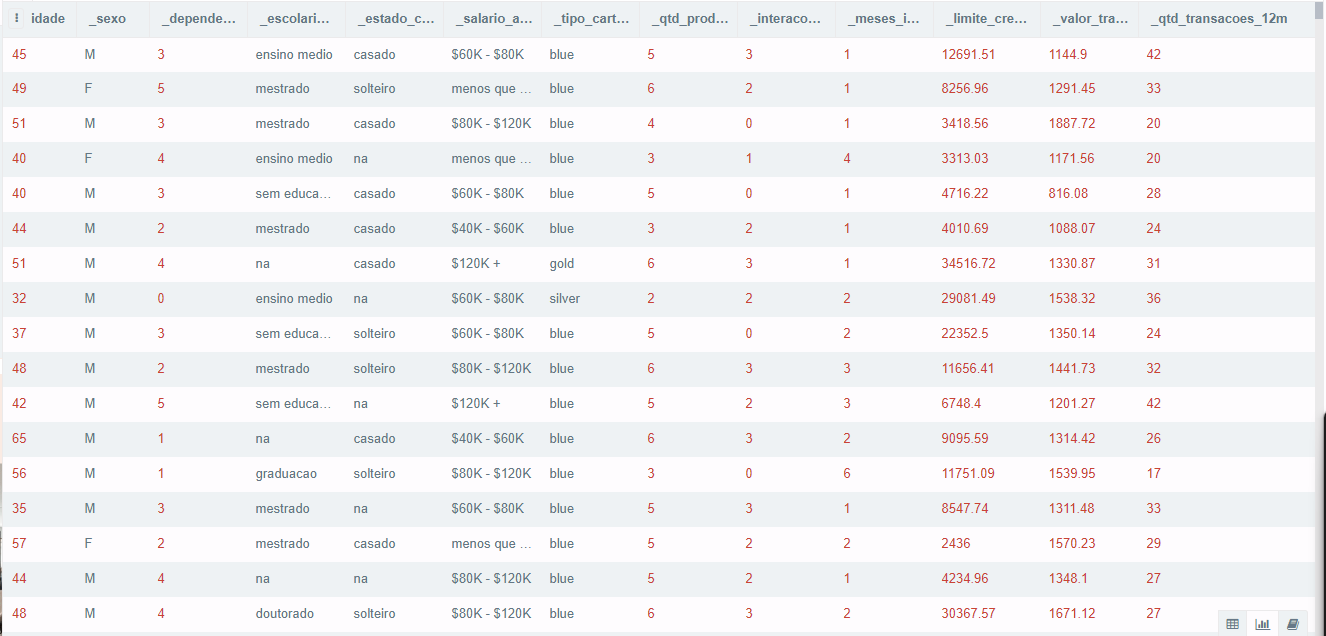

It is possible to observe **all** the raw data of the presented credit analysis table.

---

# QUERY 2: Quantity of Data:
> To find out how many customers are present in the table I will use:
​
```sql
select count(*)
from credit_analysis
```

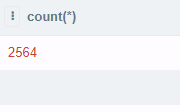

It is present in the table **2564** customers in the base.

---

# QUERY 3: Top 5 Limits:
> As I want to find out which are the 5 customers with the highest credit limits in the table, I will run the command:

```sql
select *
from credit_analysis
order by _limit_credit desc
limit 5
```



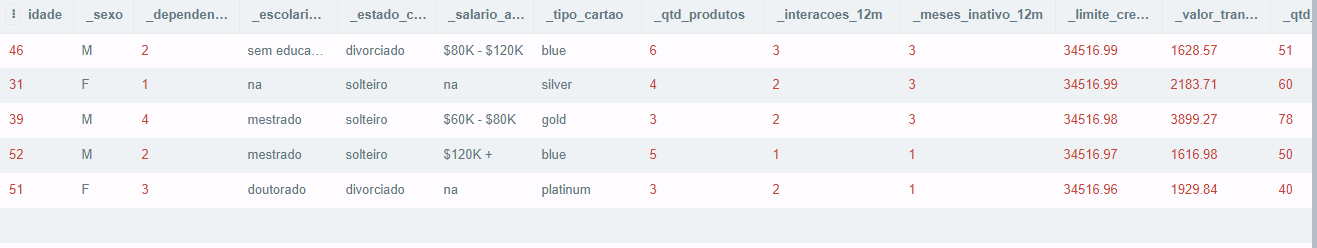


>Very curious to see that most clients with **higher limits** are **single** and **male**. It is also possible to analyze that these customers are older, with an average of **44 years old**.

---

# QUERY 4: The 5 Lowest Limits
>Following the same logic as in the previous Query, let's discover the smallest limits of the table and see if we can find any relationship between the data.
```sql
select *
from credit_analysis
order by _limit_credit asc
limit 5
```

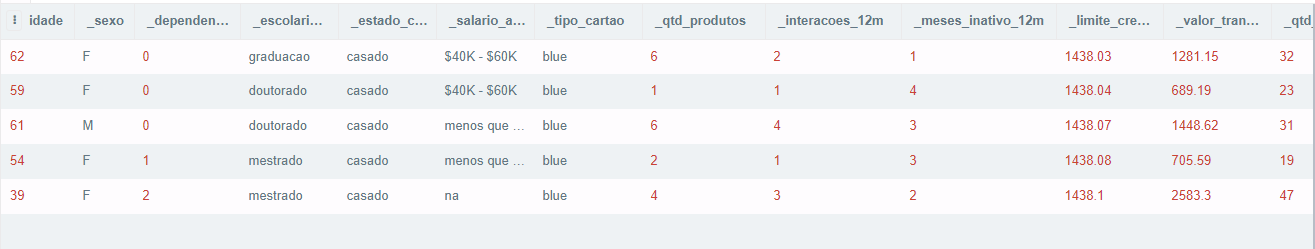

> Contrary to what was presented in the previous Query, all customers are **married** and most are **female**, which may possibly indicate a **pay inequality** between men and women. Another information present in this result was that all card types are **blue**.

# QUERY 5: Average threshold by Gender:
> Now let's find out what is the average limit granted by the financial institution by gender
​
```sql
select _sex, avg(_limit_credit) as average_LimitCredit_per_sex
from credit_analysis
GROUP by _sex# QUERY 5: Média de limite por Sexo:
```





![](http://)



>Interesting to analyze that **male** clients have an average limit much higher than **female** clients.

---

# QUERY 6: Customer base by gender and average age:
> In order to know a little more about the bank's customer base to find out the target audience, we will run a command to find out the percentage of customers by gender and their average age:
​
```sql
select _sex, count(_sex) as customers, avg(age)
from credit_analysis
group by _sex# QUERY 6: A base de clientes por sexo e a média de idade:
```


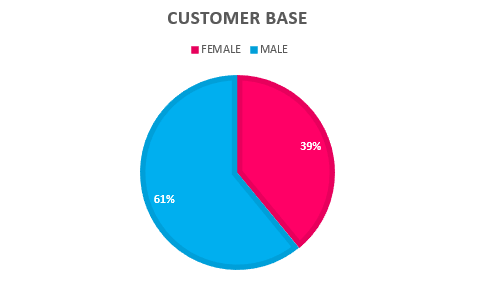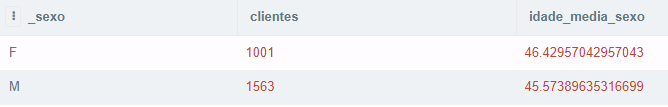

> It is interesting to note that most customers are **male** and both sexes have an **average age** very close to each other, however we can say that the average age range of the bank is around the **46 years old**.

---

# QUERY 7: Average limit granted by level of education:

> In order to know if customers with a higher level of education have a higher limit, I will execute the following command:
```sql
select _schooling, avg(_limit_credit) as average_limite_credito
from credit_analysis
GROUP by _schooling
ORDER by average_limit_credit desc
```


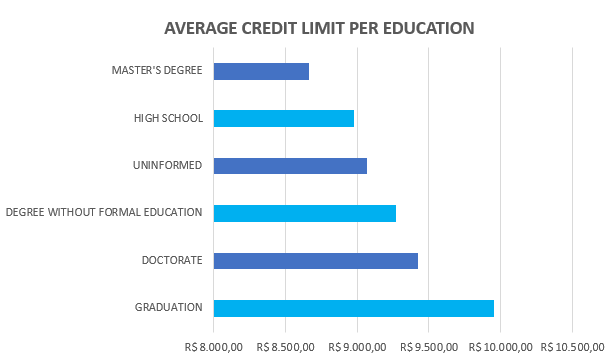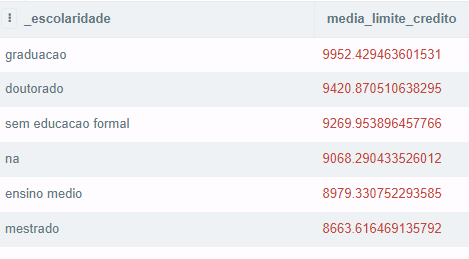


 >It can be observed that the level of education of the clients **does not have** much relation with the limit given to them. We can use as an example the category of people **without formal education** have a higher limit than people with **master's.**


---

# QUERY 8: Annual salary and Transactions carried out during the year

>Now we will do an analysis based on the **annual salary** of the clients. Let's see if the **higher** the client's salary is, the **more** will be its value/amount transacted in the institution. For this we will leave out customers who do not have a defined salary **(na)**.
```sql
SELECT _annual_salary, avg(_value_transactions_12m) the average_value_transactions12months, avg(_qtd_transacoes_12m) the average_quantity_transactions12months
FROM credit_analysis
where _annual_salary != 'na'
group by _annual_salary
order by media_valor_transacoes12meses desc
```


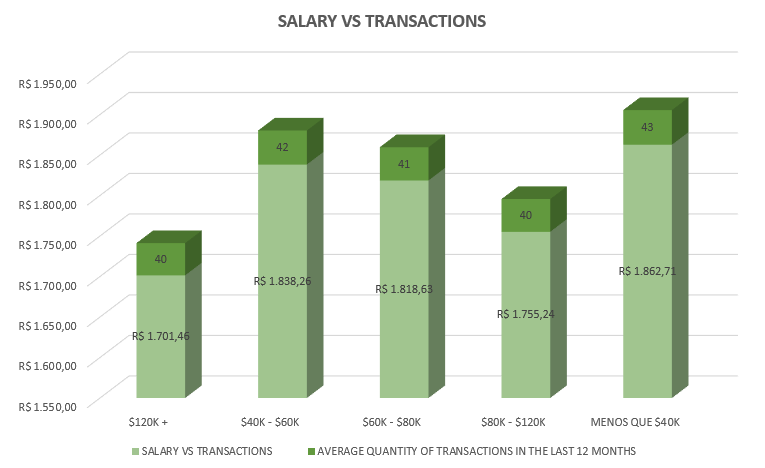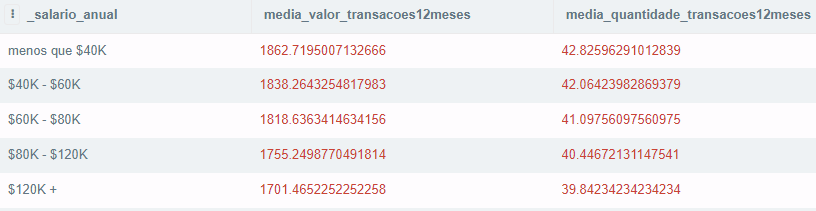

> It was possible to notice that the salary category with the highest average movement in the institution were those with an annual salary of **less than 40 thousand reais**, the **lowest** group in the table. That is, it is not because a customer has a high salary that he will consequently carry out more transactions.

---

# QUERY 9: Knowing the Frequency of Customers
> In order to know more about our customer base and see a little about their **activity**, we will produce a query to find out how this **frequency and interaction** of users at the financial institution is. For this I will use the **inactive months** column.
```sql
select count(_inactive_months_12m) as Customer_Base, avg(_inactive_months_12m) as User_inactivity_average,
CASE
when _months_inactive_12m > 3 then 'User not very active'
when En _meses_inativo_12m <= 3 then 'User active'
END
as Frequency_User
from credit_analysis
GROUP by Frequency_User
```

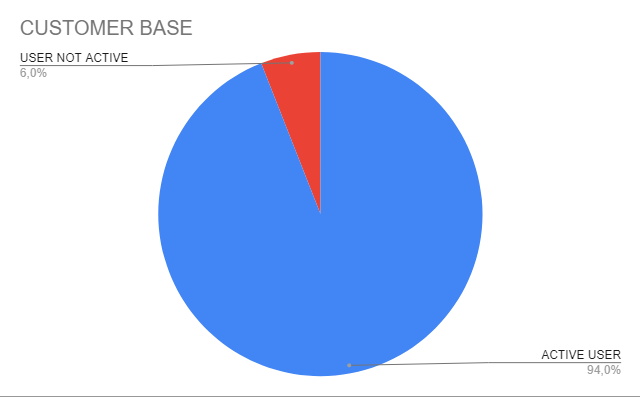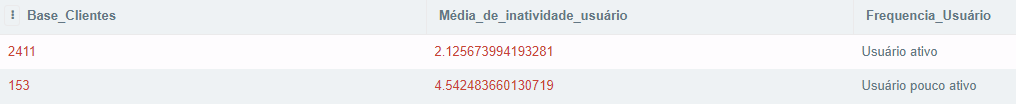

> It can be seen that this customer base is **very active**, being composed of only 6% of Users with **low frequency** in the institution. Average **downtime** per user is also low.

---

# QUERY 10: Credit Limit based on Card type:
>Now to find out if the offered credit limit correlates with the customer's card type, I'll use the following Query:
```sql
SELECT _type_card, avg(_limit_credit) as Average_limit_Credit, avg(_value_transactions_12m) as Average_Valor_Transacionado_12months
from credit_analysis
GROUP by _card_type
ORDER by avg(_credit_limit) desc
```

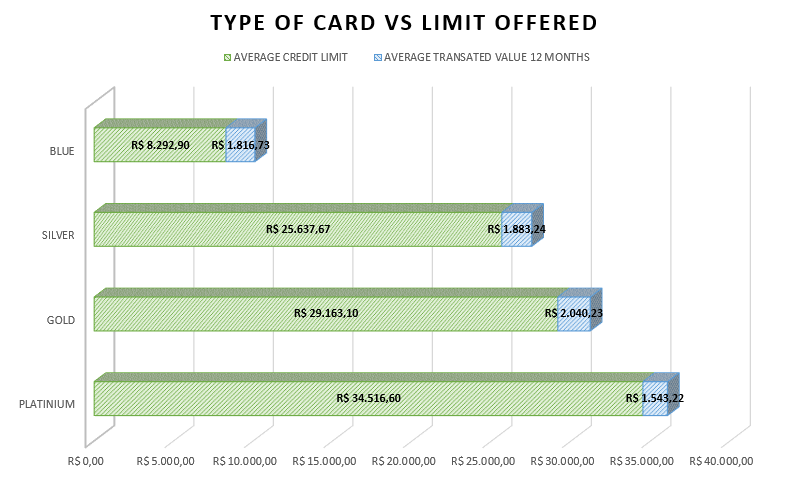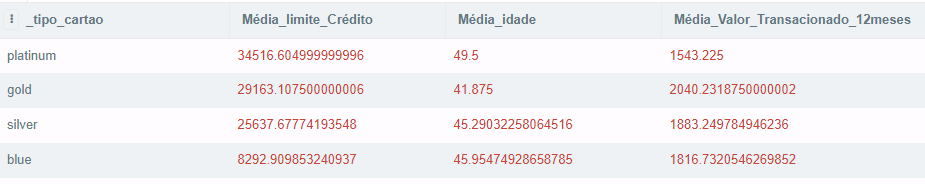

>Considering the order of the best cards: ***Platinum, Gold, Silver and blue*** we can reach a conclusion that the **card type** is directly correlated with the **average credit limit** offered by institution. However, we also see that it does not mean that because the **limit** offered is high that the average customer performs **high transactions** during the year. The **average age** can also be observed in one more query to confirm the thesis that a high age can **favor** in the limit.


---

# **Conclusion:**
* The Table has information from **2,564** customers.
​
* Clients with higher limits are **single** and **male**.
​
* Clients with lower limits are **married** and most are **female** with
**blue** card.
​
* Customers of the **male** sex have an average limit much higher than the **female** customers.
​
* The institution's general customer base is made up mostly of **men** and the average age is close to **46 years old**.
​
* Customers' **education** has little to do with the **credit limit** given to them.
​
* Customers who have an annual salary of less than **40 thousand reais** represented the highest average movement, the lowest salary group in the table.
​
* The customer base is **very active**, being composed of only **6%** of Users with **low frequency.**
​
* The type of card **correlates** directly with the **average credit limit** offered by the institution.

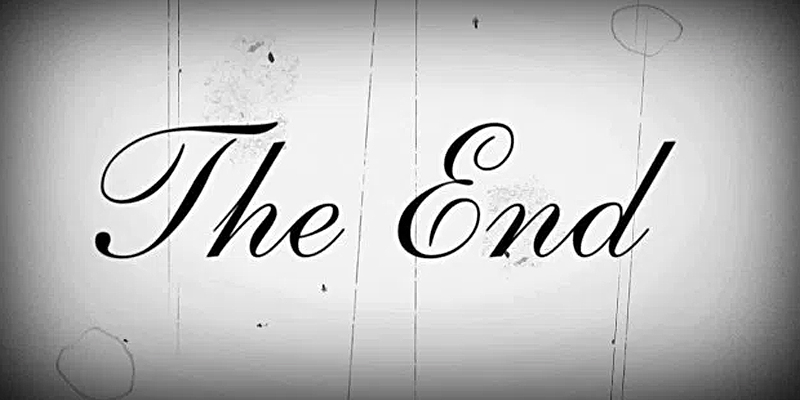